In [298]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import datetime
import pytz
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from textblob import TextBlob, Word, Blobber

In [299]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("DIGHUM Sentiment").worksheet("GoogleNews")
googleDF = pd.DataFrame(sheet.get_all_records())
#Converting string dates to datetime objects
googleDF['date'] = [pytz.utc.localize(datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %Z')) for d in list(googleDF['date'])]
googleDF


,query,date,source,title,description
0,Black Lives Matter,2020-06-23 22:43:05+00:00,CNN,The Black Lives Matter protests preview the po...,The Black Lives Matter protests preview the po...
1,Black Lives Matter,2020-06-24 04:04:00+00:00,CNN,Black Lives Matter movement: Live updates - CNN,Black Lives Matter movement: Live updates
2,Black Lives Matter,2020-06-23 22:39:24+00:00,The New York Times,Teens Are on Front Lines of Black Lives Matter...,Teens Are on Front Lines of Black Lives Matter...
3,Black Lives Matter,2020-06-23 16:07:02+00:00,Vox.com,Black Lives Matter protests reveal that white ...,Black Lives Matter protests reveal that white ...
4,Black Lives Matter,2020-06-23 08:33:55+00:00,Amnesty International,USA: End unlawful police violence against Blac...,USA: End unlawful police violence against Blac...
...,...,...,...,...,...
6104,Democratic,2020-06-14 21:09:37+00:00,The Spectator USA,You can't rally. We can riot - The Spectator USA,You can't rally. We can riot
6105,Democratic,2020-06-15 04:03:00+00:00,Jakarta Post,"‘A Thousand Cuts’ shows democracy on trial, bu...","‘A Thousand Cuts’ shows democracy on trial, bu..."
6106,Democratic,2020-06-14 17:10:08+00:00,NJ TODAY,Lisa McCormick does not pull her punches! - NJ...,Lisa McCormick does not pull her punches!
6107,Democratic,2020-06-14 14:41:00+00:00,KXAN.com,State of Texas: Increasing calls for police re...,State of Texas: Increasing calls for police re...


In [300]:
sheet = client.open("DIGHUM Sentiment").worksheet("YahooNews")
yahooDF = pd.DataFrame(sheet.get_all_records())
yahooDF['date'] = [datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %z') for d in list(yahooDF['date'])]
yahooDF

,query,date,source,title,description
0,Black Lives Matter,2020-06-22 15:15:57-04:00,Yahoo News,White House says Trump has no apology for call...,Press secretary Kayleigh McEnany said Monday t...
1,Black Lives Matter,2020-06-23 16:08:44-04:00,NBC News,Murder of Asian American decades ago newly rel...,AAPI history is built atop “faultlines of xeno...
2,Black Lives Matter,2020-06-23 05:01:58-04:00,Reuters,Seattle police investigate new shooting near a...,Police tweeted the shooting took place on the ...
3,Black Lives Matter,2020-06-22 06:39:04-04:00,The Independent,Man arrested after 73-year-old woman punched i...,New York police have arrested a homeless man s...
4,Black Lives Matter,2020-06-23 14:22:00-04:00,Popular Mechanics,The Best Drones for Any Budget and Pilot,William Barr said Geoffrey Berman resigned bef...
...,...,...,...,...,...
3230,Democratic,2020-06-14 00:33:10-04:00,The Telegraph,"Failings of founder are a lesson, says Chief S...",Chief Scout has said that the movement cannot ...
3231,Democratic,2020-06-13 02:17:00-04:00,Reuters,Canada spy agency warned of &#39;shock waves&#...,Canada's intelligence agency warned that arres...
3232,Democratic,2020-06-14 18:00:00-04:00,The National Interest,Do the Moral Arguments About the Atomic Bombin...,Did Washington do it on purpose and delay acce...
3233,Democratic,2020-06-13 20:58:21-04:00,The Daily Beast,Trump’s Deployment of National Guard to Deal W...,President Donald Trump’s decision to deploy th...


In [301]:
d = bingDF['date'][0]
d
#Converting string dates to datetime objects




Timestamp('2020-06-23 21:01:00+0000', tz='UTC')

In [302]:
sheet = client.open("DIGHUM Sentiment").worksheet("BingNews")
bingDF = pd.DataFrame(sheet.get_all_records())
bingDF['date'] = [pytz.utc.localize(datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %Z')) for d in list(bingDF['date'])]
bingDF

,query,date,source,title,description
0,Black Lives Matter,2020-06-23 21:01:00+00:00,CNN,Black Lives Matter,"Tim Scott, the only Black Republican in the ch..."
1,Black Lives Matter,2020-06-23 22:23:00+00:00,Reuters,Black Lives Matter movement,Wolverhampton Wanderers boss Nuno Espirito San...
2,Black Lives Matter,2020-06-23 20:27:00+00:00,BroadwayWorld,Support for 'Black Lives Matter' a good sign: ...,Broadway Sessions continues to celebrate Black...
3,Black Lives Matter,2020-06-23 20:00:00+00:00,Washington Post,BROADWAY SESSIONS Continues Black Lives Matter...,A Minnesota Congressman on Tuesday used white ...
4,Black Lives Matter,2020-06-23 18:42:00+00:00,BuzzFeed News,GOP lawmakers launch new attacks on Black Live...,Even though hundreds of thousands of protester...
...,...,...,...,...,...
820,Democratic,2020-06-13 08:44:00+00:00,Indianapolis Star,Georgia's 7th District Democratic Primary Too ...,"While Donald Trump will have the big ""celebrat..."
821,Democratic,2020-06-12 14:31:13+00:00,Los Angeles Times on MSN.com,"Faced with coronavirus, Republican and Democra...","This year, the GOP has opted to reuse its 2016..."
822,Democratic,2020-06-12 09:08:00+00:00,Washington Times,Op-Ed: Here’s what the Republican and Democrat...,"The great irony here is that yes, there’s plen..."
823,Democratic,2020-06-12 05:20:00+00:00,Indianapolis Star,Of course there is systemic racism in America ...,Originally scheduled to draw hundreds of party...


In [303]:
def addSentimentValues(df):
    start = datetime.datetime.now()
    analyzer = SentimentIntensityAnalyzer()
    titleNegatives = []
    titleNeutrals = []
    titlePositives = []
    titleCompounds = []
    descriptionPositives = []
    descriptionNeutrals = []
    descriptionNegatives = []
    
    descriptionCompounds = []
    titleTBsentiments = []
    descriptionTBsentiments = []
    titleTBsubjectivitys = []
    descriptionTBsubjectivitys = []
    for i in range(len(df['description'])):
        print(i)
        title = df['title'][i]
        description = df['description'][i]

        titleAnalysis = analyzer.polarity_scores(title)

        titleNegatives.append(titleAnalysis['neg'])
        titleNeutrals.append(titleAnalysis['neu'])
        titlePositives.append(titleAnalysis['pos'])
        titleCompounds.append(titleAnalysis['compound'])
    
    
        descriptionAnalysis = analyzer.polarity_scores(description)
        
        descriptionNegatives.append(descriptionAnalysis['neg'])
        descriptionNeutrals.append(descriptionAnalysis['neu'])
        descriptionPositives.append(descriptionAnalysis['pos'])
        descriptionCompounds.append(descriptionAnalysis['compound'])
        
        
        titleTB = TextBlob(title).sentiment
        descriptionTB = TextBlob(description).sentiment
        
        titleTBsentiments.append(titleTB.polarity)
        descriptionTBsentiments.append(descriptionTB.polarity)
        titleTBsubjectivitys.append(titleTB.subjectivity)
        descriptionTBsubjectivitys.append(titleTB.subjectivity)
    df['title negative'] = titleNegatives
    df['title neutral'] = titleNeutrals
    df['title positive'] = titlePositives
    df['title compound'] = titleCompounds
    df['description negative'] = descriptionNegatives
    df['description neutral'] = descriptionNeutrals
    df['description positive'] = descriptionPositives
    df['description compound'] = descriptionCompounds
    df['tb title sentiment'] = titleTBsentiments
    df['tb title subjectivity'] = titleTBsubjectivitys
    df['tb description sentiment' ] = descriptionTBsentiments
    df['tb description subjectivity'] = descriptionTBsentiments
    end2 = datetime.datetime.now()
    change2 = end2 - start
    return df

In [304]:
googleDf = addSentimentValues(googleDF)
yahooDf = addSentimentValues(yahooDF)
bingDf = addSentimentValues(bingDF)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286


3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130


5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904


1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725


3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
19

In [305]:
bingDF

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-23 21:01:00+00:00,CNN,Black Lives Matter,"Tim Scott, the only Black Republican in the ch...",0.000,0.645,0.355,0.0258,0.066,0.865,0.069,0.0240,-0.166667,0.433333,-0.057937,-0.057937
1,Black Lives Matter,2020-06-23 22:23:00+00:00,Reuters,Black Lives Matter movement,Wolverhampton Wanderers boss Nuno Espirito San...,0.000,0.732,0.268,0.0258,0.070,0.753,0.177,0.4588,-0.166667,0.433333,-0.166667,-0.166667
2,Black Lives Matter,2020-06-23 20:27:00+00:00,BroadwayWorld,Support for 'Black Lives Matter' a good sign: ...,Broadway Sessions continues to celebrate Black...,0.000,0.511,0.489,0.6908,0.000,0.812,0.188,0.5719,0.266667,0.516667,-0.083333,-0.083333
3,Black Lives Matter,2020-06-23 20:00:00+00:00,Washington Post,BROADWAY SESSIONS Continues Black Lives Matter...,A Minnesota Congressman on Tuesday used white ...,0.000,0.891,0.109,0.0258,0.091,0.909,0.000,-0.2263,-0.166667,0.433333,0.000000,0.000000
4,Black Lives Matter,2020-06-23 18:42:00+00:00,BuzzFeed News,GOP lawmakers launch new attacks on Black Live...,Even though hundreds of thousands of protester...,0.372,0.543,0.085,-0.5719,0.147,0.753,0.100,-0.0754,-0.015152,0.443939,0.019167,0.019167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Democratic,2020-06-13 08:44:00+00:00,Indianapolis Star,Georgia's 7th District Democratic Primary Too ...,"While Donald Trump will have the big ""celebrat...",0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.400000,0.500000,0.000000,0.000000
821,Democratic,2020-06-12 14:31:13+00:00,Los Angeles Times on MSN.com,"Faced with coronavirus, Republican and Democra...","This year, the GOP has opted to reuse its 2016...",0.000,1.000,0.000,0.0000,0.066,0.784,0.150,0.5267,0.000000,0.000000,-0.500000,-0.500000
822,Democratic,2020-06-12 09:08:00+00:00,Washington Times,Op-Ed: Here’s what the Republican and Democrat...,"The great irony here is that yes, there’s plen...",0.000,0.815,0.185,0.3612,0.148,0.587,0.265,0.6369,0.000000,0.000000,0.800000,0.800000
823,Democratic,2020-06-12 05:20:00+00:00,Indianapolis Star,Of course there is systemic racism in America ...,Originally scheduled to draw hundreds of party...,0.218,0.638,0.144,-0.3400,0.000,0.784,0.216,0.7717,0.000000,0.000000,0.137500,0.137500


In [306]:
googleDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-23 22:43:05+00:00,CNN,The Black Lives Matter protests preview the po...,The Black Lives Matter protests preview the po...,0.127,0.800,0.073,-0.2023,0.146,0.769,0.085,-0.2023,-0.166667,0.433333,-0.166667,-0.166667
1,Black Lives Matter,2020-06-24 04:04:00+00:00,CNN,Black Lives Matter movement: Live updates - CNN,Black Lives Matter movement: Live updates,0.000,0.864,0.136,0.0258,0.000,0.820,0.180,0.0258,-0.015152,0.466667,-0.015152,-0.015152
2,Black Lives Matter,2020-06-23 22:39:24+00:00,The New York Times,Teens Are on Front Lines of Black Lives Matter...,Teens Are on Front Lines of Black Lives Matter...,0.119,0.812,0.069,-0.2023,0.173,0.727,0.100,-0.2023,-0.015152,0.443939,-0.166667,-0.166667
3,Black Lives Matter,2020-06-23 16:07:02+00:00,Vox.com,Black Lives Matter protests reveal that white ...,Black Lives Matter protests reveal that white ...,0.272,0.592,0.136,-0.5106,0.309,0.537,0.154,-0.5106,-0.083333,0.216667,-0.083333,-0.083333
4,Black Lives Matter,2020-06-23 08:33:55+00:00,Amnesty International,USA: End unlawful police violence against Blac...,USA: End unlawful police violence against Blac...,0.351,0.585,0.064,-0.7096,0.426,0.496,0.078,-0.7096,-0.083333,0.216667,-0.166667,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,Democratic,2020-06-14 21:09:37+00:00,The Spectator USA,You can't rally. We can riot - The Spectator USA,You can't rally. We can riot,0.286,0.714,0.000,-0.5574,0.419,0.581,0.000,-0.5574,0.000000,0.000000,0.000000,0.000000
6105,Democratic,2020-06-15 04:03:00+00:00,Jakarta Post,"‘A Thousand Cuts’ shows democracy on trial, bu...","‘A Thousand Cuts’ shows democracy on trial, bu...",0.110,0.590,0.300,0.7964,0.122,0.548,0.330,0.7964,0.500000,0.600000,0.500000,0.500000
6106,Democratic,2020-06-14 17:10:08+00:00,NJ TODAY,Lisa McCormick does not pull her punches! - NJ...,Lisa McCormick does not pull her punches!,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000
6107,Democratic,2020-06-14 14:41:00+00:00,KXAN.com,State of Texas: Increasing calls for police re...,State of Texas: Increasing calls for police re...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000


In [307]:
yahooDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-22 15:15:57-04:00,Yahoo News,White House says Trump has no apology for call...,Press secretary Kayleigh McEnany said Monday t...,0.076,0.924,0.000,-0.0382,0.000,0.925,0.075,0.2755,0.000000,0.000000,-0.075000,-0.075000
1,Black Lives Matter,2020-06-23 16:08:44-04:00,NBC News,Murder of Asian American decades ago newly rel...,AAPI history is built atop “faultlines of xeno...,0.251,0.749,0.000,-0.6908,0.000,1.000,0.000,0.0000,0.133333,0.300000,0.000000,0.000000
2,Black Lives Matter,2020-06-23 05:01:58-04:00,Reuters,Seattle police investigate new shooting near a...,Police tweeted the shooting took place on the ...,0.000,1.000,0.000,0.0000,0.085,0.889,0.026,-0.6808,0.212121,0.518182,0.080000,0.080000
3,Black Lives Matter,2020-06-22 06:39:04-04:00,The Independent,Man arrested after 73-year-old woman punched i...,New York police have arrested a homeless man s...,0.237,0.763,0.000,-0.4767,0.268,0.732,0.000,-0.9231,0.000000,0.000000,0.068182,0.068182
4,Black Lives Matter,2020-06-23 14:22:00-04:00,Popular Mechanics,The Best Drones for Any Budget and Pilot,William Barr said Geoffrey Berman resigned bef...,0.000,0.625,0.375,0.6369,0.167,0.833,0.000,-0.2500,1.000000,0.300000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,Democratic,2020-06-14 00:33:10-04:00,The Telegraph,"Failings of founder are a lesson, says Chief S...",Chief Scout has said that the movement cannot ...,0.242,0.758,0.000,-0.4939,0.106,0.787,0.107,-0.4331,0.000000,0.000000,0.133461,0.133461
3231,Democratic,2020-06-13 02:17:00-04:00,Reuters,Canada spy agency warned of &#39;shock waves&#...,Canada's intelligence agency warned that arres...,0.290,0.710,0.000,-0.5423,0.116,0.813,0.071,-0.5267,-0.050000,0.000000,-0.071886,-0.071886
3232,Democratic,2020-06-14 18:00:00-04:00,The National Interest,Do the Moral Arguments About the Atomic Bombin...,Did Washington do it on purpose and delay acce...,0.184,0.816,0.000,-0.4019,0.165,0.647,0.187,0.0772,0.000000,0.250000,0.000000,0.000000
3233,Democratic,2020-06-13 20:58:21-04:00,The Daily Beast,Trump’s Deployment of National Guard to Deal W...,President Donald Trump’s decision to deploy th...,0.128,0.872,0.000,-0.2263,0.050,0.909,0.042,-0.3274,0.000000,0.000000,0.101042,0.101042


In [308]:
import matplotlib.pyplot as plt

In [309]:
googleDF['search engine'] = ['Google'] * len(googleDF['date'])
yahooDF['search engine'] = ['Yahoo'] * len(yahooDF['date'])
bingDF['search engine'] = ['Bing'] * len(bingDF['date'])

In [310]:
allData = pd.concat([googleDF, yahooDF, bingDF])

In [311]:
allData

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity,search engine
0,Black Lives Matter,2020-06-23 22:43:05+00:00,CNN,The Black Lives Matter protests preview the po...,The Black Lives Matter protests preview the po...,0.127,0.800,0.073,-0.2023,0.146,0.769,0.085,-0.2023,-0.166667,0.433333,-0.166667,-0.166667,Google
1,Black Lives Matter,2020-06-24 04:04:00+00:00,CNN,Black Lives Matter movement: Live updates - CNN,Black Lives Matter movement: Live updates,0.000,0.864,0.136,0.0258,0.000,0.820,0.180,0.0258,-0.015152,0.466667,-0.015152,-0.015152,Google
2,Black Lives Matter,2020-06-23 22:39:24+00:00,The New York Times,Teens Are on Front Lines of Black Lives Matter...,Teens Are on Front Lines of Black Lives Matter...,0.119,0.812,0.069,-0.2023,0.173,0.727,0.100,-0.2023,-0.015152,0.443939,-0.166667,-0.166667,Google
3,Black Lives Matter,2020-06-23 16:07:02+00:00,Vox.com,Black Lives Matter protests reveal that white ...,Black Lives Matter protests reveal that white ...,0.272,0.592,0.136,-0.5106,0.309,0.537,0.154,-0.5106,-0.083333,0.216667,-0.083333,-0.083333,Google
4,Black Lives Matter,2020-06-23 08:33:55+00:00,Amnesty International,USA: End unlawful police violence against Blac...,USA: End unlawful police violence against Blac...,0.351,0.585,0.064,-0.7096,0.426,0.496,0.078,-0.7096,-0.083333,0.216667,-0.166667,-0.166667,Google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Democratic,2020-06-13 08:44:00+00:00,Indianapolis Star,Georgia's 7th District Democratic Primary Too ...,"While Donald Trump will have the big ""celebrat...",0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.400000,0.500000,0.000000,0.000000,Bing
821,Democratic,2020-06-12 14:31:13+00:00,Los Angeles Times on MSN.com,"Faced with coronavirus, Republican and Democra...","This year, the GOP has opted to reuse its 2016...",0.000,1.000,0.000,0.0000,0.066,0.784,0.150,0.5267,0.000000,0.000000,-0.500000,-0.500000,Bing
822,Democratic,2020-06-12 09:08:00+00:00,Washington Times,Op-Ed: Here’s what the Republican and Democrat...,"The great irony here is that yes, there’s plen...",0.000,0.815,0.185,0.3612,0.148,0.587,0.265,0.6369,0.000000,0.000000,0.800000,0.800000,Bing
823,Democratic,2020-06-12 05:20:00+00:00,Indianapolis Star,Of course there is systemic racism in America ...,Originally scheduled to draw hundreds of party...,0.218,0.638,0.144,-0.3400,0.000,0.784,0.216,0.7717,0.000000,0.000000,0.137500,0.137500,Bing


In [312]:
keep =[x for x in range(len(list(allData['query']))) if list(allData['query'])[x] in ['Black Lives Matter', 'All Lives Matter', 'Blue Lives Matter']]

In [313]:
allMData = allData.iloc[keep]
allMData

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity,search engine
0,Black Lives Matter,2020-06-23 22:43:05+00:00,CNN,The Black Lives Matter protests preview the po...,The Black Lives Matter protests preview the po...,0.127,0.800,0.073,-0.2023,0.146,0.769,0.085,-0.2023,-0.166667,0.433333,-0.166667,-0.166667,Google
1,Black Lives Matter,2020-06-24 04:04:00+00:00,CNN,Black Lives Matter movement: Live updates - CNN,Black Lives Matter movement: Live updates,0.000,0.864,0.136,0.0258,0.000,0.820,0.180,0.0258,-0.015152,0.466667,-0.015152,-0.015152,Google
2,Black Lives Matter,2020-06-23 22:39:24+00:00,The New York Times,Teens Are on Front Lines of Black Lives Matter...,Teens Are on Front Lines of Black Lives Matter...,0.119,0.812,0.069,-0.2023,0.173,0.727,0.100,-0.2023,-0.015152,0.443939,-0.166667,-0.166667,Google
3,Black Lives Matter,2020-06-23 16:07:02+00:00,Vox.com,Black Lives Matter protests reveal that white ...,Black Lives Matter protests reveal that white ...,0.272,0.592,0.136,-0.5106,0.309,0.537,0.154,-0.5106,-0.083333,0.216667,-0.083333,-0.083333,Google
4,Black Lives Matter,2020-06-23 08:33:55+00:00,Amnesty International,USA: End unlawful police violence against Blac...,USA: End unlawful police violence against Blac...,0.351,0.585,0.064,-0.7096,0.426,0.496,0.078,-0.7096,-0.083333,0.216667,-0.166667,-0.166667,Google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e...",0.190,0.700,0.110,-0.2023,0.209,0.791,0.000,-0.5423,0.000000,0.050000,-0.333333,-0.333333,Bing
773,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...,0.000,1.000,0.000,0.0000,0.292,0.708,0.000,-0.7906,0.000000,0.100000,-0.300000,-0.300000,Bing
774,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...,0.231,0.594,0.175,-0.4019,0.000,0.956,0.044,0.0258,-0.483333,0.666667,0.080000,0.080000,Bing
775,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...,0.000,0.927,0.073,0.0258,0.050,0.803,0.147,0.6369,-0.062500,0.237500,0.000000,0.000000,Bing


In [137]:
# BLM = allMData[allMData['query'] == 'Black Lives Matter']
# ALM = allMData[allMData['query'] == 'All Lives Matter']
# BuLM = allMData[allMData['query'] == 'Blue Lives Matter']
# plot data
# fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
# pd.DataFrame(allMData.groupby(['query']).)

apple_fplot = allMData.groupby(['query'])['tb description sentiment'].sum()
# plot_df = apple_fplot.unstack('query').iloc[:, 'tb description sentiment']
# plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq='A')
# plot_df.plot()
pd.DataFrame(apple_fplot)

,tb description sentiment
query,
All Lives Matter,-47.127409
Black Lives Matter,-98.479705
Blue Lives Matter,8.353457


/Users/johnschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


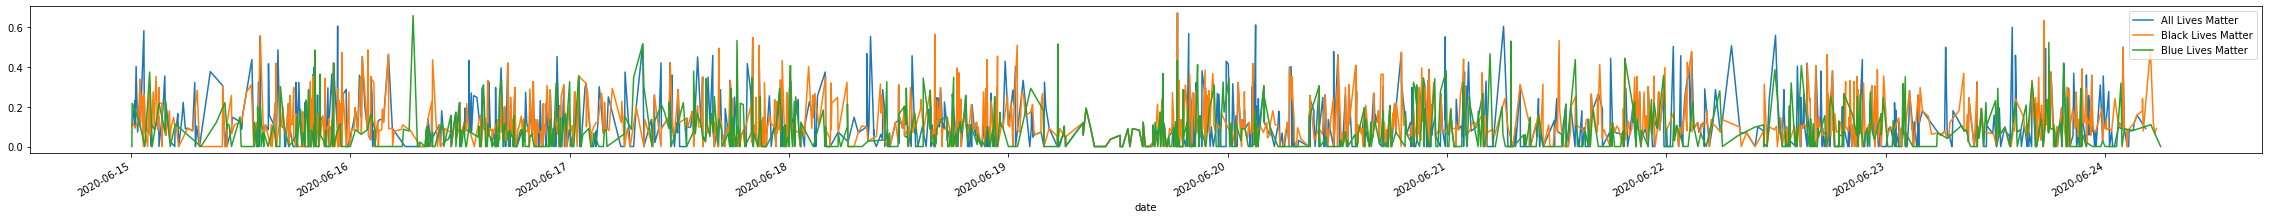

In [383]:
f = plt.figure(figsize=(40,3))
ax = plt.subplot(111)
focus = 'description positive'
allMData['date round'] = [x.strftime('%Y-%m-%d') for x in allMData['date']]
allMData[allMData['date round'] > '2020-06-14'].groupby('query').plot(x='date', y=focus, ax = ax)
plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])

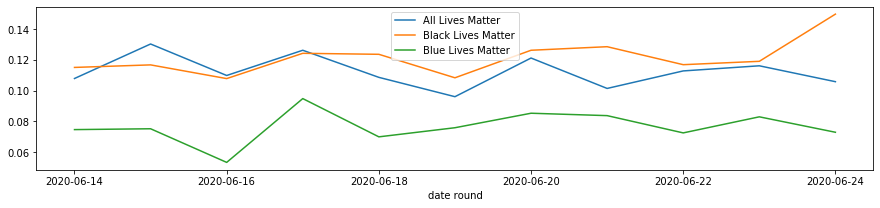

In [384]:
f = plt.figure(figsize=(15,3))
ax = plt.subplot(111)
allMData[allMData['date round'] > '2020-06-13'].groupby(['query','date round'])[focus].mean().reset_index().groupby('query').plot(x='date round', y=focus, ax = ax)
plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])


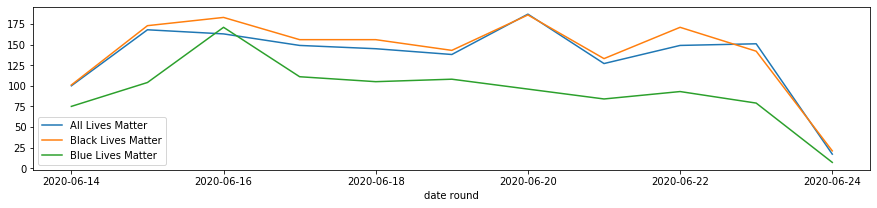

In [385]:
f = plt.figure(figsize=(15,3))
ax = plt.subplot(111)
allMData[allMData['date round'] > '2020-06-13'].groupby(['query','date round'])[focus].count().reset_index().groupby('query').plot(x='date round', y=focus, ax = ax)
plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])

1523
1533
1020


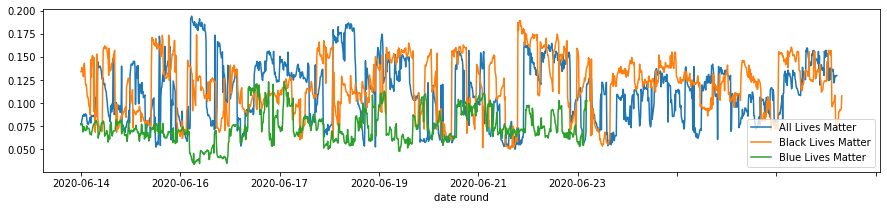

In [466]:
f = plt.figure(figsize=(15,3))
ax = plt.subplot(111)
allMData['rolling'] = allMData.groupby('query').rolling(20)[focus].mean().reset_index(drop=True)

# allMData['rolling'] = allMData.groupby(['query','date round'])[focus]
# allMData[allMData['date round'] > '2020-06-13'].groupby(['query','date round'])[focus].transform(lambda x: x.rolling(window = 50).mean()).reset_index()
count = 0
for key, grp in allMData1.groupby(['query']):
    print(len(list(grp['date round'])))
    ax = grp.plot(ax=ax, kind='line', x='date round', y='rolling', label=key)
    if count == 2:
        break
    count += 1
plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])


In [441]:
# allMData1 = allMData.sort_values('date rounded')
# allMData['rolling'] = allMData.loc[:,'tb description sentiment'].rolling(window=2).mean()
allMData

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity,search engine,date round,rolling
692,Blue Lives Matter,2020-05-28 17:07:00+00:00,Yahoo! Sports,Black Lives Matter declines olive branch from ...,Kepler originally posted a selfie of himself w...,0.184,0.735,0.081,-0.3400,0.000,1.000,0.000,0.0000,-0.083333,0.266667,0.075000,0.075000,Bing,2020-05-28,0.06264
689,Blue Lives Matter,2020-05-28 14:12:00+00:00,New York Daily News,Cincinnati police raise ‘Blue Lives Matter’ fl...,️.). The veteran Twins outfielder posted a sel...,0.000,0.726,0.274,0.5267,0.000,1.000,0.000,0.0000,-0.033333,0.083333,0.000000,0.000000,Bing,2020-05-28,0.05994
690,Blue Lives Matter,2020-05-28 20:57:00+00:00,Bleacher Report,Twins star Max Kepler posts controversial self...,Minnesota Twins outfielder Max Kepler apologiz...,0.372,0.628,0.000,-0.7717,0.122,0.786,0.092,-0.4767,0.550000,0.950000,-0.066667,-0.066667,Bing,2020-05-28,0.06014
4451,Blue Lives Matter,2020-05-29 07:00:00+00:00,Blackchronicle,(BPRW) Asian American Business Development Cen...,(BPRW) Asian American Business Development Cen...,0.082,0.872,0.046,-0.3612,0.087,0.865,0.048,-0.3612,-0.113889,0.227778,-0.113889,-0.113889,Google,2020-05-29,NaN
759,All Lives Matter,2020-05-30 11:49:00+00:00,Page Six,"Billie Eilish Slams ‘All Lives Matter,’ White ...",“IF I HEAR ONE MORE WHITE PERSON SAY ‘aLL liVe...,0.000,0.815,0.185,0.3612,0.186,0.814,0.000,-0.8088,0.000000,0.000000,0.333333,0.333333,Bing,2020-05-30,0.15258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Black Lives Matter,2020-06-24 04:57:00+00:00,Yahoo Sports,Support for 'Black Lives Matter' a good sign: ...,Support for 'Black Lives Matter' a good sign: ...,0.000,0.599,0.401,0.6908,0.000,0.511,0.489,0.6908,0.266667,0.516667,0.266667,0.266667,Google,2020-06-24,NaN
104,All Lives Matter,2020-06-24 00:08:12+00:00,The Mercury News,Kurtenbach: Why the 49ers flying a ‘Black Live...,Kurtenbach: Why the 49ers flying a ‘Black Live...,0.000,0.893,0.107,0.2023,0.000,0.859,0.141,0.2023,0.116667,0.716667,0.116667,0.116667,Google,2020-06-24,0.09298
139,All Lives Matter,2020-06-24 00:28:23+00:00,Voice of OC,Protesters Call Out Sheriff Over Spending at C...,Protesters Call Out Sheriff Over Spending at C...,0.095,0.905,0.000,-0.2263,0.119,0.881,0.000,-0.2263,0.000000,0.000000,0.000000,0.000000,Google,2020-06-24,0.13948
210,Blue Lives Matter,2020-06-24 01:50:30+00:00,FOX 31 Denver,HOA tells local police chaplain to remove ‘thi...,HOA tells local police chaplain to remove ‘thi...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,-0.133333,0.316667,-0.133333,-0.133333,Google,2020-06-24,0.13092


In [281]:
allMData1[allMData1['date rounded'].isnull()]

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity,search engine,rolling,date rounded


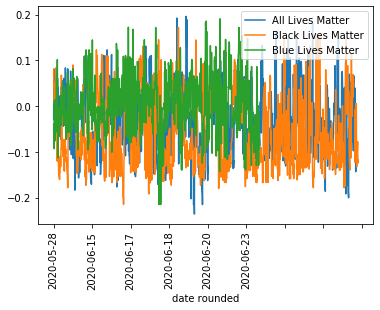

In [283]:
# ax = plt.subplot(111)
# pd.DataFrame(allMData.groupby(['query','date rounded'])['tb description sentiment'].mean()).reset_index().groupby('query').plot(x='date rounded', y='tb description sentiment', label=['BLM', 'ALM','BuLM'], ax = ax)
fig, ax = plt.subplots()
allMData1 = allMData.sort_values('date rounded')
for key, grp in allMData1.groupby(['query']):
    ax = grp.plot(ax=ax, kind='line', x='date rounded', y='rolling', label=key)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()
# .plot(x='date rounded', y='tb description sentiment', ax = ax)

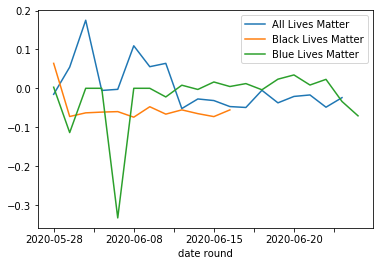

In [354]:
ax = plt.subplot(111)
plott = pd.DataFrame(allMData.groupby(['query','date round'])['tb description sentiment'].mean()).reset_index().groupby('query').plot(x='date round', y='tb description sentiment', ax = ax)
plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])

TypeError: Cannot compare tz-naive and tz-aware timestamps

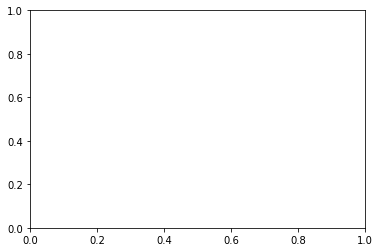

In [297]:
BuLM.plot(x="date", y= 'title compound')